In [262]:
import pandas as pd
import numpy as np
from math import ceil, floor
from random import choice

In [345]:
def load_and_process_data(path):
    history = pd.read_excel(path, sheet_name='Sheet7').dropna() # Sheet 7 contains pivot table 
    history['Team'] = float('nan')  
    
    roles = pd.read_excel(path, sheet_name='Individual_Staffing_8wk_report_', usecols=['User', 'User Job code v2']).drop_duplicates().reset_index(drop=True) # ensure roles are on sheet Individual_Staffing_8wk_report_ in column Job Code v2 
    roles = roles.rename(columns={'User Job code v2': 'User Job code'})
    
    # order of consulting roles
    role_order = ['Intern', 'Operations', 'Architect', 'Analyst', 'Consultant', 'Senior Consultant', 'Manager', 'Director', 'VP', 'Managing Director']
    roles['User Job code'] = roles['User Job code'].astype('category').cat.reorder_categories(role_order).cat.as_ordered()

    # merge pivot table with roles
    history = history.merge(roles, how='left', left_on='Employee', right_on='User')
    roles = history['User Job code']
    history = history.drop(labels=['User Job code', 'User'], axis=1)
    history.insert(2, 'Role', roles)
    
    leads = pd.read_excel(path, sheet_name='Leads', header=None) # Sheet Leads contains leads
    leads = leads.values[:,0].tolist()
    leads = [', '.join(lead.split(' ')[::-1]) for lead in leads]
    
    return history, roles, leads
    

In [346]:
history, roles, leads = load_and_process_data('Staffing History Updated.xlsx')

ValueError: Usecols do not match columns, columns expected but not found: ['User Job code a2']

In [326]:
history.head()

,#,Employee,Role,002 - Strategic Sourcing Services,2021 OPEX Cost Reduction,ACA/Retail P&L Improvement,Administrative Cost Management,Ambetter Specialist Network Rate Analysis,Analytics,Analytics Acceleration,...,Vaccine Scheduling Program Manager,Vaccine State Manager,Vaccine Tech Support On/Off,Value Based Care Analytics,VBC Support,VBP Contracting Support,VBP Data Mart Output,Vendor Risk Assessment,Vendor Risk Contract Remediation Support,Team
0,1.0,"Abbas, Hadiqa",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2.0,"Albrecht, Megan",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3.0,"Ancona, Joseph",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4.0,"Andersen, Nathan",Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5.0,"Appleman, Jeff",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [327]:
leads

['Byrnes, Kevin',
 'Fattor, Kevin',
 'Haffey, John',
 'Higgins, Tyler',
 'Levy, Elizabeth',
 'Schuhmacher, Paul']

# Greedy

In [329]:
def assign_teams_to_leads(history, leads):
    for group_num, lead in enumerate(leads):
        lead_vec = history[history['Employee'] == lead].iloc[:, 3:-1]
        history.loc[lead_vec.index, 'Team'] = group_num + 1
    return history

In [331]:
history = assign_teams_to_leads(history, leads)
history.head()

,#,Employee,Role,002 - Strategic Sourcing Services,2021 OPEX Cost Reduction,ACA/Retail P&L Improvement,Administrative Cost Management,Ambetter Specialist Network Rate Analysis,Analytics,Analytics Acceleration,...,Vaccine Scheduling Program Manager,Vaccine State Manager,Vaccine Tech Support On/Off,Value Based Care Analytics,VBC Support,VBP Contracting Support,VBP Data Mart Output,Vendor Risk Assessment,Vendor Risk Contract Remediation Support,Team
0,1.0,"Abbas, Hadiqa",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2.0,"Albrecht, Megan",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3.0,"Ancona, Joseph",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4.0,"Andersen, Nathan",Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5.0,"Appleman, Jeff",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [332]:
def generate_teams(history, selection_method, num_teams, round_funcs = [floor, ceil]):
    for group_num in range(1, num_teams + 1):
        group_avg_vec = history[history['Team'] == group_num].iloc[:, 3:-1].values.mean(axis=0)
        for role in history['Role'].cat.categories[::-1]: # loop through MDs, VPs, Directors, Managers, Senior Consultants, Analysts, and others   
            if group_num < NUM_GROUPS:
                if selection_method == 'random':
                    func = choice(round_funcs)
                    num_mbrs_from_role_in_group = func((history['Role'] == role).sum() / num_teams)
                elif selection_method == 'alternating':
                    num_mbrs_from_role_in_group = round_funcs[-1]((history['Role'] == role).sum() / num_teams)
                    round_funcs.insert(0, round_funcs.pop())
                else:
                    raise Exception('Invalid SELECTION_METHOD! Options are "random" or "alternating".')
            else:
                num_mbrs_from_role_in_group = history[(history['Role'] == role) & (history['Team'].isna())].shape[0]
            data_vecs = history[(history['Role'] == role) & (history['Team'].isna())].iloc[:, 3:-1]
            dist = pd.Series(np.linalg.norm(np.subtract(group_avg_vec, data_vecs.values), axis=1), index=data_vecs.index).sort_values()
            history.loc[dist.iloc[:num_mbrs_from_role_in_group].index, 'Team'] = group_num
    return history

In [333]:
SELECTION_METHOD = 'alternating' 
history = generate_teams(history, SELECTION_METHOD, len(leads))

**Team Breakdown**

In [334]:
history['Team'].value_counts()

1.0    37
2.0    36
3.0    36
4.0    34
5.0    32
6.0    28
Name: Team, dtype: int64

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
def save_team_dist(history, save_path):
    team_splits = history.groupby('Team')['Role'].value_counts()
    team_splits.name = None
    team_splits = team_splits.reset_index().rename(columns={0: 'Count'})
    team_splits['Team'] = team_splits['Team'].astype(int)
    team_splits['Role'] = team_splits['Role']
    
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x='Team', y='Count', hue='Role', data=team_splits)
    ax.legend(loc='upper left', bbox_to_anchor=(0.75, 1.35), ncol=3, fancybox=True, shadow=True)
    plt.title('Team Distributions')
    fig.savefig(f'{save_path}/team_dist.png', bbox_inches='tight')
    return fig
    

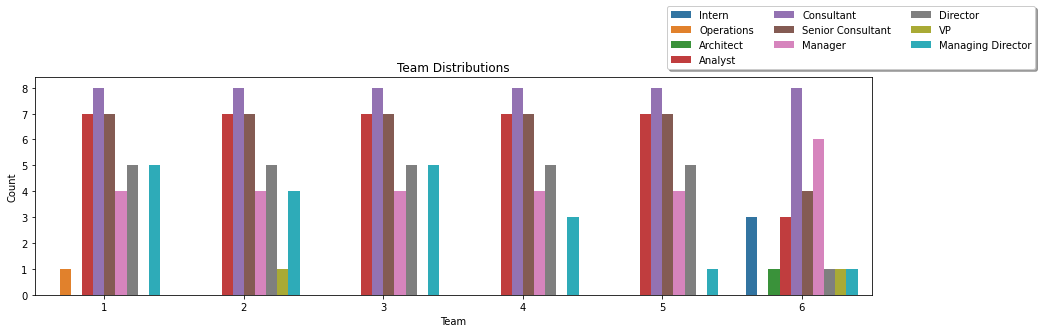

In [342]:
fig = save_team_dist(history, '.')

In [316]:
for team in sorted(history['Team'].unique()):
    display(history.loc[history['Team'] == team, 'Role'].value_counts().to_frame().T)

,Consultant,Analyst,Senior Consultant,Director,Managing Director,Manager,Operations,Intern,Architect,VP
Role,8,7,7,5,5,4,1,0,0,0


,Consultant,Analyst,Senior Consultant,Director,Manager,Managing Director,VP,Intern,Operations,Architect
Role,8,7,7,5,4,4,1,0,0,0


,Consultant,Analyst,Senior Consultant,Director,Managing Director,Manager,Intern,Operations,Architect,VP
Role,8,7,7,5,5,4,0,0,0,0


,Consultant,Analyst,Senior Consultant,Director,Manager,Managing Director,Intern,Operations,Architect,VP
Role,8,7,7,5,4,3,0,0,0,0


,Consultant,Analyst,Senior Consultant,Director,Manager,Managing Director,Intern,Operations,Architect,VP
Role,8,7,7,5,4,1,0,0,0,0


,Consultant,Manager,Senior Consultant,Intern,Analyst,Architect,Director,VP,Managing Director,Operations
Role,8,6,4,3,3,1,1,1,1,0


# Visualize

In [317]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
pca = PCA(n_components=2)
ppl_red_pca = pca.fit_transform(history.iloc[:,3:-1].values)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


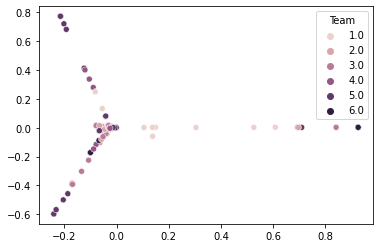

In [319]:
sns.scatterplot(ppl_red_pca[:,0], ppl_red_pca[:,1], hue=history['Team'])

In [320]:
tsne = TSNE(n_components=2)
ppl_red_tsne = tsne.fit_transform(history.iloc[:,3:-1].values)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


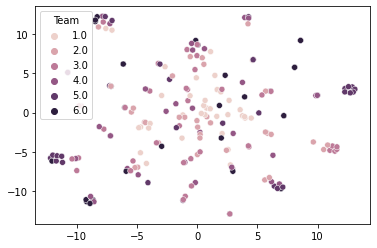

In [321]:
sns.scatterplot(ppl_red_tsne[:,0], ppl_red_tsne[:,1], hue=history['Team'])

# Export

In [343]:
def export(history, save_path):
    history.to_csv(f'{save_path}/assignments_greedy.csv')

In [322]:
export(history, '.')